**Python libraries**
---


In [10]:
!pip install transformers

In [11]:
!pip install lime

In [12]:
!pip install anchor-exp

In [13]:
!pip install torch transformers spacy && python -m spacy download en_core_web_lg

2023-08-19 07:27:25.906049: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [14]:
!pip install torch transformers spacy && python -m spacy download en_core_web_sm

2023-08-19 07:27:53.138024: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.6.0/en_core_web_sm-3.6.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False # if autocompletion doesnot work in kaggle notebook | hit tab

In [16]:
import numpy as np
import pandas as pd
#import torch
#import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
#device = torch.device("cuda")

In [17]:
! pip install eli5==0.13.0
! pip install jinja2==3.0.0

In [18]:
import scipy
import numpy as np
def monkeypath_itemfreq(sampler_indices):
   return zip(*np.unique(sampler_indices, return_counts=True))

scipy.stats.itemfreq=monkeypath_itemfreq

**Load Data**
---



In [19]:
df1=pd.read_csv("Covid_full.csv",usecols=["data","label"])
#df=pd.read_csv("mixed_domain_godamit.csv",usecols=["data","label","index"],index_col="index")

In [20]:
df=pd.DataFrame({"label":[],"data":[]})
df["label"]=df1.loc[:15000]["label"]
df["data"]=df1.loc[:15000]["data"]

In [21]:
df

label                                               data
0          1  taking hot bath prevent new coronavirus diseas...
1          0              coronavirus vaccines months fake news
2          1  april different covid vaccine candidates devel...
3          0  claim german parliament passed law september c...
4          0  dominic raab said covid tests false positive rate
...      ...                                                ...
14996      1  covid could affect kids long term social devel...
14997      0     trump bailed wall street main street well said
14998      0  claims afghanistan government announced covid ...
14999      1  first lesson covid invest healthcare infrastru...
15000      0  royal palace confirms queen elizabeth tests po...

[15001 rows x 2 columns]

In [22]:
df.isna().sum()

label    0
data     0
dtype: int64

In [23]:
df_temp=pd.read_csv("kd_dataset.csv",usecols=["data","label"])
df_temp

data  label
0      people power natives declare treaty rights pol...      1
1      trump son met russian lawyer damaging informat...      1
2       women testifying cosby court lets new york times      0
3      allegedly french magazine praising sisi respon...      0
4      trump meets biotech ceos farm advisers fret em...      1
...                                                  ...    ...
80412   vitamin c protects coronavirus truth comes light      0
80413  covid vaccine candidate shows promise research...      1
80414                      graphic supreme court roundup      1
80415  covid ct chinese researchers detail chest ct f...      1
80416  russian foreign ministry says eyes better ties...      1

[80417 rows x 2 columns]

In [24]:
import pandas as pd
df_val=pd.DataFrame({"label":[],"data":[]})
df_val["label"]=df_temp.loc[:20000]["label"]
df_val["data"]=df_temp.loc[:20000]["data"]

In [25]:
df_val

label                                               data
0          1  people power natives declare treaty rights pol...
1          1  trump son met russian lawyer damaging informat...
2          0   women testifying cosby court lets new york times
3          0  allegedly french magazine praising sisi respon...
4          1  trump meets biotech ceos farm advisers fret em...
...      ...                                                ...
19996      1  digital lock google facebook take aim fake new...
19997      0  hello michigan people send lady psychiatric ho...
19998      0  roger ailes advising donald trump ahead presid...
19999      1            scaramucci awaits u approval china deal
20000      0  unreal cbs ted koppel tells sean hannity bad a...

[20001 rows x 2 columns]

In [26]:
df_val.isna().sum()

label    0
data     0
dtype: int64

In [27]:
df_val['label'].value_counts()

0    10066
1     9935
Name: label, dtype: int64

In [28]:
df_test=pd.DataFrame({"label":[],"data":[]})
df_test["label"]=df_temp.loc[20001:40000]["label"]
df_test["data"]=df_temp.loc[20001:40000]["data"]

In [29]:
df_test

label                                               data
20001      1  chinese political dissidents organs cut bodies...
20002      0   milo takes selfies uc davis protestors breitbart
20003      1        trump order study abuses u trade agreements
20004      1  trump condemns anti semitism israel holocaust ...
20005      0  eric trump tries defend donald tax evasion mak...
...      ...                                                ...
39996      1  syrian kurds favor attending russia backed pea...
39997      0  obama finally builds border wall one problem o...
39998      1     merkel abe agree sanctions north korea stepped
39999      0  g exposure alter structure function hemoglobin...
40000      0     gascony delicious corner france new york times

[20000 rows x 2 columns]

In [30]:
df_test.isna().sum()

label    0
data     0
dtype: int64

In [31]:
df_test['label'].value_counts()

0    10109
1     9891
Name: label, dtype: int64

In [32]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df.loc[:int(0.7*df.shape[0]),'data'],df.loc[:int(0.7*df.shape[0]):,'label'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=df.loc[:0.7*int(df.shape[0]),'label'])

In [33]:
val_text_cov=df_val.loc[:,"data"].values
val_labels_cov=df_val.loc[:,"label"].values
test_text_cov=df_test.loc[:,"data"].values
test_labels_cov=df_test.loc[:,"label"].values

In [34]:
val_labels_cov[0]

1

**Tokenizer**
---



In [35]:
#from transformers import AutoTokenizer,TFAutoModel
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
device = torch.device("cuda")

In [36]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df.loc[:int(0.7*df.shape[0]),'data'],df.loc[:int(0.7*df.shape[0]):,'label'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=df.loc[:0.7*int(df.shape[0]),'label'])

In [37]:
model_name="bert-base-uncased"
bert = AutoModel.from_pretrained(model_name)
tokenizer = BertTokenizerFast.from_pretrained(model_name)

In [38]:
max_seq_len = 15
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

In [39]:
tokens_train

{'input_ids': [[101, 5570, 15544, 3619, 2075, 4451, 28413, 2393, 4652, 8985, 2047, 21887, 23350, 102, 0], [101, 4871, 3659, 3784, 4447, 2610, 2486, 2587, 3424, 21887, 23350, 5761, 10467, 102, 0], [101, 2228, 3522, 3314, 3104, 2466, 2893, 2149, 3571, 2242, 102, 0, 0, 0, 0], [101, 2047, 21887, 23350, 6540, 2847, 9972, 18906, 2015, 2522, 2615, 9211, 2714, 2434, 102], [101, 3979, 4319, 6022, 3796, 2220, 5711, 2522, 17258, 13685, 2529, 14095, 102, 0, 0], [101, 2047, 6994, 15410, 2613, 2051, 14494, 2751, 2241, 6994, 2071, 2393, 6819, 13153, 102], [101, 4174, 3099, 21625, 1059, 16584, 5017, 7221, 2015, 9343, 2149, 9245, 5843, 7698, 102], [101, 2047, 21887, 23350, 6540, 2847, 9972, 2671, 3260, 102, 0, 0, 0, 0, 0], [101, 3633, 6611, 2833, 4681, 3253, 25851, 2512, 5618, 6090, 3207, 7712, 102, 0, 0], [101, 9152, 2232, 4269, 2817, 24110, 27351, 6151, 12870, 10985, 3572, 21887, 23350, 8985, 102], [101, 3720, 6815, 2296, 2160, 4374, 3477, 4638, 5037, 5622, 8180, 2231, 102, 0, 0], [101, 4366, 6845, 8

In [40]:
decode_1 = tokenizer.decode(tokens_train.input_ids[0])
print(decode_1)

[CLS] regularly rinsing nose saline help prevent infection new coronavirus [SEP] [PAD]


In [41]:
max_seq_len = 15
tokens_temp = tokenizer.batch_encode_plus(
    temp_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False,
    padding=True,
    return_tensors='tf',
    return_attention_mask = True,
    verbose = True
)

In [42]:
decode_temp = tokenizer.decode(tokens_temp.input_ids[0])

print(decode_temp)

[CLS] two married italian doctors helped fight covid died virus [SEP] [PAD] [PAD] [PAD]


In [43]:
max_seq_len=15
tokens_val = tokenizer.batch_encode_plus(
    val_text_cov.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)
tokens_test = tokenizer.batch_encode_plus(
    test_text_cov.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


In [44]:
decode_2 = tokenizer.decode(tokens_val.input_ids[0])

print(decode_2)

[CLS] people power natives declare treaty rights police admit defeat cite lack manpower remove [SEP]


In [45]:
decode_3 = tokenizer.decode(tokens_test.input_ids[0])

print(decode_3)

[CLS] chinese political dissidents organs cut bodies transplant tourists [SEP] [PAD] [PAD] [PAD]


In [46]:
#tokens_train['input_ids'].shape

In [47]:
#tokens_train['attention_mask'].shape

In [48]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels_cov.tolist())
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels_cov.tolist())

In [49]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 4
train_data = TensorDataset(train_seq, train_mask, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
val_data = TensorDataset(val_seq, val_mask, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [50]:
#y_train = train_labels.values
#y_train

**Model**
---



In [51]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [52]:
for param in bert.parameters():
    param.requires_grad = False

In [53]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)
      self.relu =  nn.ReLU()
      self.fc1 = nn.Linear(768,512)
      self.fc2 = nn.Linear(512,2)
      self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id,mask):
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
      #_, cls_hs = self.bert(sent_id, return_dict=False)
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)
      x = self.softmax(x)
      return x

In [54]:
device = torch.device("cuda")
model = BERT_Arch(bert)
model= model.to(device)

In [55]:
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr = 2e-05)

In [56]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels
                                    )
class_weights = dict(zip(np.unique(train_labels), class_weights))

li=[]
li.append(class_weights[0])
li.append(class_weights[1])
print(li)

[0.9881688625974724, 1.0121178738639494]


In [57]:
weights= torch.tensor(li,dtype=torch.float)
weights = weights.to(device)
cross_entropy  = nn.NLLLoss(weight=weights)
epochs = 20

In [58]:
def train():
  model.train()
  total_loss, total_accuracy = 0, 0
  total_preds=[]
  for step,batch in enumerate(train_dataloader):
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r.to(device) for r in batch]
    sent_id, mask, labels = batch
    model.zero_grad()
    preds = model(sent_id, mask)
    loss = cross_entropy(preds, labels)
    total_loss = total_loss + loss.item()
    loss.backward()
    #gradients are clipped to prevent the exploding gradient problem which is an unusual update in gradients during back propagation
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    preds=preds.detach().cpu().numpy()
    total_preds.append(preds)
  avg_loss = total_loss / len(train_dataloader)
  total_preds  = np.concatenate(total_preds, axis=0)
  return avg_loss, total_preds

In [59]:
def evaluate():
  print("\nEvaluating...")
  model.eval()
  total_loss, total_accuracy = 0, 0
  total_preds = []
  for step,batch in enumerate(val_dataloader):
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
    batch = [t.to(device) for t in batch]
    sent_id, mask, labels = batch
    #sent_id, labels = batch

    with torch.no_grad():
      preds = model(sent_id, mask)
      #preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
      total_preds.append(preds)
  avg_loss = total_loss / len(val_dataloader)
  total_preds  = np.concatenate(total_preds, axis=0)
  return avg_loss, total_preds

In [60]:
best_valid_loss = float('inf')
train_losses=[]
valid_losses=[]
for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss, _ = train()
    valid_loss, _ = evaluate()
    #weights of the model with the lowest validation loss are saved
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 20
  Batch    50  of  1,838.
  Batch   100  of  1,838.
  Batch   150  of  1,838.
  Batch   200  of  1,838.
  Batch   250  of  1,838.
  Batch   300  of  1,838.
  Batch   350  of  1,838.
  Batch   400  of  1,838.
  Batch   450  of  1,838.
  Batch   500  of  1,838.
  Batch   550  of  1,838.
  Batch   600  of  1,838.
  Batch   650  of  1,838.
  Batch   700  of  1,838.
  Batch   750  of  1,838.
  Batch   800  of  1,838.
  Batch   850  of  1,838.
  Batch   900  of  1,838.
  Batch   950  of  1,838.
  Batch 1,000  of  1,838.
  Batch 1,050  of  1,838.
  Batch 1,100  of  1,838.
  Batch 1,150  of  1,838.
  Batch 1,200  of  1,838.
  Batch 1,250  of  1,838.
  Batch 1,300  of  1,838.
  Batch 1,350  of  1,838.
  Batch 1,400  of  1,838.
  Batch 1,450  of  1,838.
  Batch 1,500  of  1,838.
  Batch 1,550  of  1,838.
  Batch 1,600  of  1,838.
  Batch 1,650  of  1,838.
  Batch 1,700  of  1,838.
  Batch 1,750  of  1,838.
  Batch 1,800  of  1,838.

Evaluating...
  Batch    50  of  5,001.
  Batch 

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')

    # Plot ROC AUC
    plt.figure(figsize=(8, 6))  # Increase the figure size if needed
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f, Accuracy = %0.2f%%' % (roc_auc, accuracy*100))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate', fontsize=20)  # Increase the font size here
    plt.ylabel('True Positive Rate', fontsize=20)  # Increase the font size here
    plt.title('Receiver Operating Characteristic', fontsize=24)  # Increase the font size here
    plt.legend(loc='lower right', fontsize=12)  # You can also increase the font size for the legend if needed
    plt.grid(True)  # Add grid lines
    plt.show()


**Train Set**

In [74]:
#model.load_state_dict(torch.load(path))
with torch.no_grad():
  preds = model(train_seq.to(device),train_mask.to(device))
  preds1 = preds.detach().cpu().numpy()
preds = np.argmax(preds1, axis = 1)
test_y = torch.tensor(train_labels.tolist())
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3719
           1       0.86      0.87      0.87      3631

    accuracy                           0.87      7350
   macro avg       0.87      0.87      0.87      7350
weighted avg       0.87      0.87      0.87      7350



In [75]:
import torch.nn.functional as F
prb = torch.from_numpy(preds1)
probs = F.softmax(prb, dim=1).cpu().numpy()

AUC: 0.9366
Accuracy: 86.71%


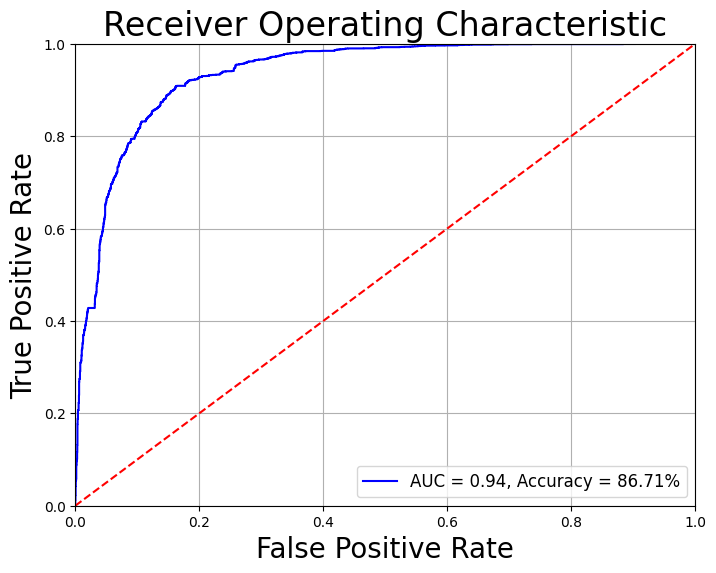

In [76]:
evaluate_roc(probs, test_y)

**Test Covid Validation set**

In [65]:
#model.load_state_dict(torch.load(path))
with torch.no_grad():
  preds = model(val_seq.to(device),val_mask.to(device))
  preds2 = preds.detach().cpu().numpy()
preds = np.argmax(preds2, axis = 1)
test_y = torch.tensor(val_labels_cov.tolist())
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.56      0.95      0.71     10066
           1       0.84      0.24      0.38      9935

    accuracy                           0.60     20001
   macro avg       0.70      0.60      0.54     20001
weighted avg       0.70      0.60      0.54     20001



In [66]:
import torch.nn.functional as F
prb = torch.from_numpy(preds2)
probs = F.softmax(prb, dim=1).cpu().numpy()

AUC: 0.9366
Accuracy: 86.71%


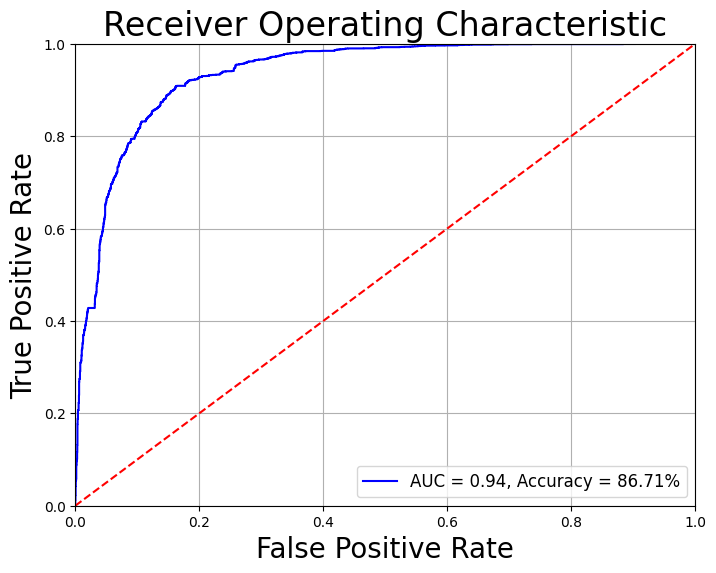

In [77]:
evaluate_roc(probs, test_y)

**Test Covid test set**

In [91]:
#model.load_state_dict(torch.load(path))
with torch.no_grad():
  preds = model(test_seq.to(device),test_mask.to(device))
  preds3 = preds.detach().cpu().numpy()
preds = np.argmax(preds3, axis = 1)
test_y = torch.tensor(test_labels_cov.tolist())
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67     10109
           1       0.65      0.28      0.39      9891

    accuracy                           0.57     20000
   macro avg       0.60      0.57      0.53     20000
weighted avg       0.60      0.57      0.53     20000



In [92]:
import torch.nn.functional as F
prb = torch.from_numpy(preds3)
probs = F.softmax(prb, dim=1).cpu().numpy()

In [93]:
preds = probs[:, 1]
y_pred = np.where(preds >= 0.5, 1, 0)

AUC: 0.6267
Accuracy: 60.38%


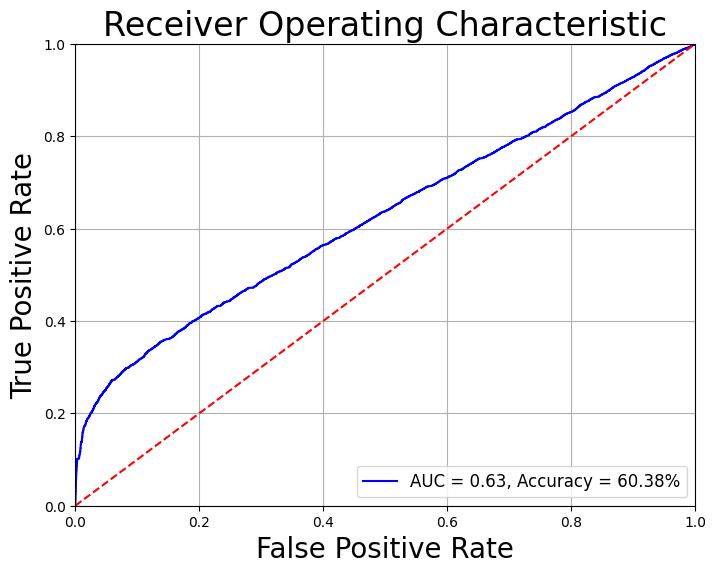

In [80]:
evaluate_roc(probs, test_y)

In [81]:
test_y = torch.tensor(test_labels_cov.tolist())
print(test_y)

tensor([1, 0, 1,  ..., 1, 0, 0])


In [94]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [95]:
 # Replace with your tensor data
df_test['y_pred'] = y_pred.tolist()

In [96]:
df_test.to_csv("exp1_results.csv")

In [86]:
test_y.shape

torch.Size([20000])

In [82]:
prb = torch.from_numpy(preds3)
probs = F.softmax(prb, dim=1).cpu().numpy()
probs

array([[9.9955767e-01, 4.4235401e-04],
       [9.9815887e-01, 1.8411577e-03],
       [9.9845219e-01, 1.5477423e-03],
       ...,
       [9.9926227e-01, 7.3767838e-04],
       [3.2267142e-02, 9.6773279e-01],
       [9.4174892e-01, 5.8251075e-02]], dtype=float32)

Test

Model_Saving
---

In [83]:
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

**LIME**
---



In [84]:
# for LIME import necessary packages
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from sklearn.linear_model import Ridge, lars_path
from lime.lime_text import explanation
from functools import partial
import scipy as sp
from sklearn.utils import check_random_state
import numpy as np
import lime
import torch
import torch.nn.functional as F
from lime.lime_text import LimeTextExplainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [85]:
class_names = ['Real','Fake']
explainer1 = LimeTextExplainer(class_names=class_names)

In [97]:
def tokenize_bert(x):
  tokens_test = tokenizer.batch_encode_plus(
      list(x[:]),
      #list(x[:].values())[1],
      max_length = max_seq_len,
      pad_to_max_length=True,
      truncation=True,
      return_token_type_ids=False
  )
  #print(x[:].dtype)
  test_seq = torch.tensor(tokens_test['input_ids'])
  test_mask = torch.tensor(tokens_test['attention_mask'])
  return test_seq,test_mask

In [98]:
def predict_probab(x):
    input_ids,attention_mask=tokenize_bert(x)
    preds = model(input_ids.to(device),attention_mask.to(device))
    preds = preds.detach().cpu().numpy()
    scores = (np.exp(preds).T / np.exp(preds).sum(-1)).T
    t = torch.from_numpy(scores)
    val = t.softmax(1).detach().numpy()
    return val

Predict_prob


**Text for explanation**

1.   True Positive - "covid chinese health authorities confirm patient zero sex bats"
2.   True Negative - "  taking hot bath prevent new coronavirus disease taking hot bath prevent     "
3.   False Positive -"trump condemns anti semitism israel holocaust remembrance day"
4.   False Negative -"exposure alter structure function hemoglobin causing coronavirus patients die oxygen dep"


True Positive

In [99]:
True_Positive ="covid chinese health authorities confirm patient zero sex bats"

In [100]:
TP_exp = explainer1.explain_instance(True_Positive, predict_probab, num_features=10, num_samples=150)

In [101]:
TP_exp.show_in_notebook()

In [102]:
TP_exp.as_list()

[('covid', 0.03215992439354068),
 ('authorities', -0.030021454667592803),
 ('confirm', -0.027578531712182382),
 ('zero', -0.02473074355886326),
 ('sex', -0.02016912982576274),
 ('bats', -0.01404426855184325),
 ('chinese', -0.010195719312337566),
 ('patient', 0.005580215393026246),
 ('health', -0.003059209586121396)]

True Negative

In [103]:
True_Negative ="taking hot bath will prevent new coronavirus disease taking hot bath prevent"

In [104]:
TN_exp = explainer1.explain_instance(True_Negative, predict_probab, num_features=100, num_samples=150)

In [105]:
TN_exp.show_in_notebook()

In [118]:
TN_exp.as_list()

[('hot', 0.04497754505046496),
 ('prevent', 0.03399406819652797),
 ('taking', 0.023465068750073786),
 ('bath', 0.008329723637957177),
 ('new', 0.006800404175707702),
 ('coronavirus', -0.006351483822769761),
 ('will', -0.005732144902156015),
 ('disease', -0.0009235936508526792)]

False Positive

In [112]:
False_Positive ="trump condemns anti semitism israel holocaust remembrance day" #False

In [113]:
FP_exp = explainer1.explain_instance(False_Positive, predict_probab, num_features=100, num_samples=150)

In [114]:
FP_exp.show_in_notebook()

In [119]:
FP_exp.as_list()

[('day', -0.028131491751053537),
 ('trump', -0.028092090560143907),
 ('condemns', -0.027507986940058137),
 ('semitism', -0.01386666954203418),
 ('israel', -0.01070438565515494),
 ('anti', -0.007069298281492644),
 ('holocaust', -0.006658638885262574),
 ('remembrance', -0.003175520051504178)]

False Negative

In [115]:
False_Negative ="exposure alter structure function hemoglobin causing coronavirus patients die oxygen dep"

In [116]:
FN_exp = explainer1.explain_instance(False_Negative, predict_probab, num_features=100, num_samples=150)

In [117]:
FN_exp.show_in_notebook()

In [120]:
FN_exp.as_list()

[('oxygen', -0.026748218783850582),
 ('exposure', 0.020242375206451054),
 ('die', -0.014409015571880613),
 ('function', 0.012202461207956114),
 ('causing', 0.010447027929361046),
 ('alter', 0.008988641424892177),
 ('dep', 0.008317411852302135),
 ('patients', -0.007471912626600931),
 ('hemoglobin', 0.005734955337691638),
 ('structure', 0.003504563962677278),
 ('coronavirus', -9.680493523459629e-05)]

**ELI5**
---

In [121]:
import scipy as sp
import torch.nn.functional as F

In [122]:
def tokenize_bert(x):
  tokens_test = tokenizer.batch_encode_plus(
      list(x[:]),
      #list(x[:].values())[1],
      max_length = max_seq_len,
      pad_to_max_length=True,
      truncation=True,
      return_token_type_ids=False
  )
  #print(x[:].dtype)
  test_seq = torch.tensor(tokens_test['input_ids'])
  test_mask = torch.tensor(tokens_test['attention_mask'])
  return test_seq,test_mask

In [123]:
import torch.nn.functional as F
def predict_probab(x):
  input_ids,attention_mask=tokenize_bert(x)
  out= model(input_ids.to(device),attention_mask.to(device))
  outt1 = out.detach().cpu().numpy()
  tt = torch.from_numpy(outt1)
  probs = F.softmax(tt, dim=1).cpu().numpy()
  return probs

In [124]:
import eli5
from eli5.lime import TextExplainer
te = TextExplainer(random_state=42,n_samples=200,expand_factor=10)
te.fit(True_Positive, predict_probab)
print(True_Positive)
te.show_prediction()

covid chinese health authorities confirm patient zero sex bats


In [125]:
import eli5
from eli5.lime import TextExplainer
te = TextExplainer(random_state=42,n_samples=200,expand_factor=10)
te.fit(True_Negative, predict_probab)
print(True_Negative)
te.show_prediction(target_names=["Real","Fake"])

taking hot bath will prevent new coronavirus disease taking hot bath prevent


In [126]:
import eli5
from eli5.lime import TextExplainer
te = TextExplainer(random_state=42,n_samples=200,expand_factor=10)
te.fit(False_Positive, predict_probab)
print(False_Positive)
te.show_prediction(target_names=["Real","Fake"])

trump condemns anti semitism israel holocaust remembrance day


In [127]:
te.show_weights(top=20)

In [128]:
import eli5
from eli5.lime import TextExplainer


te = TextExplainer(random_state=42,n_samples=200,expand_factor=10)
te.fit(False_Negative, predict_probab)
print(False_Negative)
te.show_prediction(target_names=["Real","Fake"])

exposure alter structure function hemoglobin causing coronavirus patients die oxygen dep


In [129]:
te.show_weights(top=20)

**Anchor**
---

In [130]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 17.0 MB/s eta 0:00:00


In [131]:
from __future__ import print_function
%load_ext autoreload
%autoreload 2
import spacy
import string
import numpy as np
import numpy as np
np.random.seed(1)
import sys
import sklearn
import sklearn.ensemble
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from alibi.explainers import AnchorText
from alibi.datasets import fetch_movie_sentiment
from alibi.utils import spacy_model
from alibi.utils import DistilbertBaseUncased, BertBaseUncased, RobertaBase

In [132]:
model1 = 'en_core_web_md'
spacy_model(model=model1)
nlp = spacy.load(model1)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ As of spaCy v3.0, model symlinks are not supported anymore. You can
load trained pipeline packages using their full names or from a directory
path.


In [133]:
def tokenize_berta(x):
  tokens_test_temp = tokenizer.batch_encode_plus(
      list(x[:]),
      #list(x[:].values())[1],
      max_length = max_seq_len,
      pad_to_max_length=True,
      truncation=True,
      return_token_type_ids=False
  )
  #print(x[:].dtype)
  test_seq_temp = torch.tensor(tokens_test_temp['input_ids'])
  test_mask_temp = torch.tensor(tokens_test_temp['attention_mask'])
  return test_seq_temp,test_mask_temp

In [134]:
def predict_probab_anchor_max(x):
  #for i in x:
  input_ids,attention_mask=tokenize_berta(x)
  preds = model(input_ids.to(device),attention_mask.to(device))
  preds = preds.detach().cpu().numpy()
  tt = torch.from_numpy(preds)
  pred1 = np.argmax(tt, axis = 1)
  return np.array(pred1)

In [135]:
#class_names = df2.label
class_names=["Real","Fake"]
print(class_names)
# select instance to be explained
text = "Trump looms behind both Obama and Haley speeches"
print("* Text: %s" % text)

#data=df2.data
# compute class prediction
pred = class_names[predict_probab_anchor_max(text)[0]]
alternative =  class_names[1 - predict_probab_anchor_max(text)[0]]
print("* Prediction: %s" % pred)
print("* alternative: %s" % alternative)

['Real', 'Fake']
* Text: Trump looms behind both Obama and Haley speeches
* Prediction: Fake
* alternative: Real


In [136]:
explanation

<module 'lime.explanation' from '/usr/local/lib/python3.10/dist-packages/lime/explanation.py'>

In [137]:
language_model =BertBaseUncased()

All PyTorch model weights were used when initializing TFBertForMaskedLM.

All the weights of TFBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


In [138]:
explainer = AnchorText(
    predictor=predict_probab_anchor_max,
    sampling_strategy="language_model",   # use language model to predict the masked words
    language_model=language_model,        # language model to be used
    filling="parallel",                   # just one pass through the transformer
    sample_proba=0.5,                     # probability of masking a word
    frac_mask_templates=0.1,              # fraction of masking templates (smaller value -> faster, less diverse)
    use_proba=True,                       # use words distribution when sampling (if False sample uniform)
    top_n=20,                             # consider the fist 20 most likely words
    temperature=1.0,                      # higher temperature implies more randomness when sampling
    stopwords=['and', 'a', 'but', 'in'],  # those words will not be sampled
    batch_size_lm=32,                     # language model maximum batch size
)

In [139]:
explanation = explainer.explain(True_Positive, threshold=0.95)

In [140]:
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('\nExamples where anchor applies and model predicts %s:' % pred)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_true']]))
print('\nExamples where anchor applies and model predicts %s:' % alternative)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_false']]))

Anchor: chinese AND sex AND authorities AND zero
Precision: 0.97

Examples where anchor applies and model predicts Fake:
covid chinese health authorities confirm patient zero sex data
covid chinese health authorities confirm patient zero sex list
covid chinese health authorities confirm patient zero sex anonymous
covid chinese health authorities confirm patient zero sex data
covid chinese health authorities confirm patient zero sex case
covid chinese health authorities confirm patient zero sex and
covid chinese health authorities confirm patient zero sex online
covid chinese health authorities confirm patient zero sex and
covid chinese health authorities confirm patient zero sex unknown
covid chinese health authorities confirm patient zero sex case

Examples where anchor applies and model predicts Real:
the chinese immigration authorities confirm that zero sex bats
covid chinese health authorities confirm patient zero sex report
covid chinese health authorities confirm patient zero sex

In [141]:
explanation = explainer.explain(True_Negative, threshold=0.95)

In [142]:
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('\nExamples where anchor applies and model predicts %s:' % pred)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_true']]))
print('\nExamples where anchor applies and model predicts %s:' % alternative)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_false']]))

Anchor: hot
Precision: 1.00

Examples where anchor applies and model predicts Fake:
running hot bath to prevent new lung disease taking hot bath and
hot hot bath helps prevent new lung disease taking hot bath to
providing hot bath to prevent new lung disease taking hot bath to
frequent hot bath could prevent new infectious disease taking hot bath include
taking hot water to prevent new bacterial disease taking hot bath can
running hot bath to prevent new liver disease taking hot bath may
using hot bath baths prevent new liver disease taking hot bath can
use hot bath to prevent new lung disease taking hot bath can
the hot bath to prevent new infectious disease taking hot bath include
wearing hot bath helps prevent new infectious disease taking hot bath and

Examples where anchor applies and model predicts Real:



In [143]:
explanation = explainer.explain(False_Positive, threshold=0.95)

In [144]:
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('\nExamples where anchor applies and model predicts %s:' % pred)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_true']]))
print('\nExamples where anchor applies and model predicts %s:' % alternative)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_false']]))

Anchor: day
Precision: 1.00

Examples where anchor applies and model predicts Fake:
peace the day in israel holocaust memorial day
holocaust jewish of of israel holocaust memorial day
children awards day see israel holocaust memorial day
jewish international and for israel holocaust memorial day
holocaust and day of israel holocaust information day
jewish world day on israel holocaust memorial day
israel international museum in israel holocaust memorial day
holocaust memorial day for israel holocaust remembrance day
film year day to israel holocaust memorial day
peace and day of israel holocaust memorial day

Examples where anchor applies and model predicts Real:



In [145]:
explanation = explainer.explain(False_Negative, threshold=0.95)

In [146]:
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('\nExamples where anchor applies and model predicts %s:' % pred)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_true']]))
print('\nExamples where anchor applies and model predicts %s:' % alternative)
print('\n'.join([x for x in explanation.raw['examples'][-1]['covered_false']]))

Anchor: structure AND exposure AND function
Precision: 0.97

Examples where anchor applies and model predicts Fake:
exposure alter structure function by causing some patients to develop dep
exposure alter structure function by causing more patients to high dep
exposure alter structure function by causing healthy patients to develop dep
exposure alter structure function by causing some patients to develop dep
exposure alter structure function and causing susceptible patients to develop dep
exposure alter structure function by causing several patients to with dep
exposure alter structure function by causing other patients to develop dep
exposure alter structure function by causing the patients to develop dep
exposure alter structure function while causing healthy patients to develop dep
exposure alter structure function by causing susceptible patients to develop dep

Examples where anchor applies and model predicts Real:
exposure for structure function of human coronavirus patients lose 

**SHAP**
---

In [147]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.7 MB/s eta 0:00:00


In [148]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.8 MB/s eta 0:00:00


In [149]:
dfdd=pd.read_csv("SHAP_Exp_cases.csv")
dfdd

text  label  Pred
0  covid chinese health authorities confirm patie...      0     0
1  taking hot bath will prevent new coronavirus d...      1     1
2  trump condemns anti semitism israel holocaust ...      1     0
3  exposure alter structure function hemoglobin c...      0     1

In [150]:
from nlp import Dataset
df3=pd.DataFrame({"label":[],"text":[]})
df3["label"]=dfdd.loc[:]["label"]
df3["text"]=dfdd.loc[:]["text"]
dataset = Dataset.from_pandas(df3)
#dataset[:2]

In [151]:
def tokenize_bert(x):
  tokens_test = tokenizer.batch_encode_plus(
      list(x[:]),
      #list(x[:].values())[1],
      max_length = max_seq_len,
      pad_to_max_length=True,
      truncation=True,
      return_token_type_ids=False
  )
  #print(x[:].dtype)
  test_seq = torch.tensor(tokens_test['input_ids'])
  test_mask = torch.tensor(tokens_test['attention_mask'])
  return test_seq,test_mask

In [152]:
def predict_probab(x):
    input_ids,attention_mask=tokenize_bert(x)
    preds = model(input_ids.to(device),attention_mask.to(device))
    preds = preds.detach().cpu().numpy()
    scores = (np.exp(preds).T / np.exp(preds).sum(-1)).T
    val = sp.special.logit(scores[:,1])
    return val

In [153]:
import shap
import transformers
import nlp
import torch
import numpy as np
import scipy as sp
explainer = shap.Explainer(predict_probab, tokenizer)

shap_values = explainer(dataset, fixed_context=1)

In [154]:
shap.plots.text(shap_values[:1])

In [155]:
shap.plots.text(shap_values[1:2])

In [156]:
shap.plots.text(shap_values[2:3])

In [157]:
shap.plots.text(shap_values[3:4])